# Séance 5

## Objectifs de la séance

- Régulateur P
- Analyse de la stabilité/instabilité
- Régulateur PI
- Construction asymptotiques du diagramme de Bode par décomposition de la fonction de transfert en fonctions simples

In [1]:
from IPython.display import Image, display, Markdown

from control import matlab as ml  # Python Control Systems Toolbox (compatibility with MATLAB)
import numpy as np              # Library to manipulate array and matrix
import matplotlib.pyplot as plt # Library to create figures and plots
import math # Library to be able to do some mathematical operations
import ReguLabFct as rlf # Library useful for the laboratory of regulation of HELMo Gramme

## Régulateur P

Soit la fonction de l'exercice 1 (cf. p. 7-3):

$$
G(p) = \frac{1}{(1+0,5p)*(1+0,25p)}
$$

Déterminez, à l'aide du diagramme de Nichols, le correcteur P qui permette de translater la courbe pour une marge de phase de 45° : $K_P$= ...

:::{admonition} Astuce
:class: tip
Une fonction fournie dans le package `ReguLabFct` permet d'obtenir le gain et la fréquence d'un système donnée à une phase donnée. Il s'agit de la fonction `getValues` (cf. documentation du package `ReguLabFct`).
:::

Gain à -135° = -17.56544890480597 dB
Fréquence à -135° = 7.1233661553256065 rad/sec
Kp = 7.5556606703682965


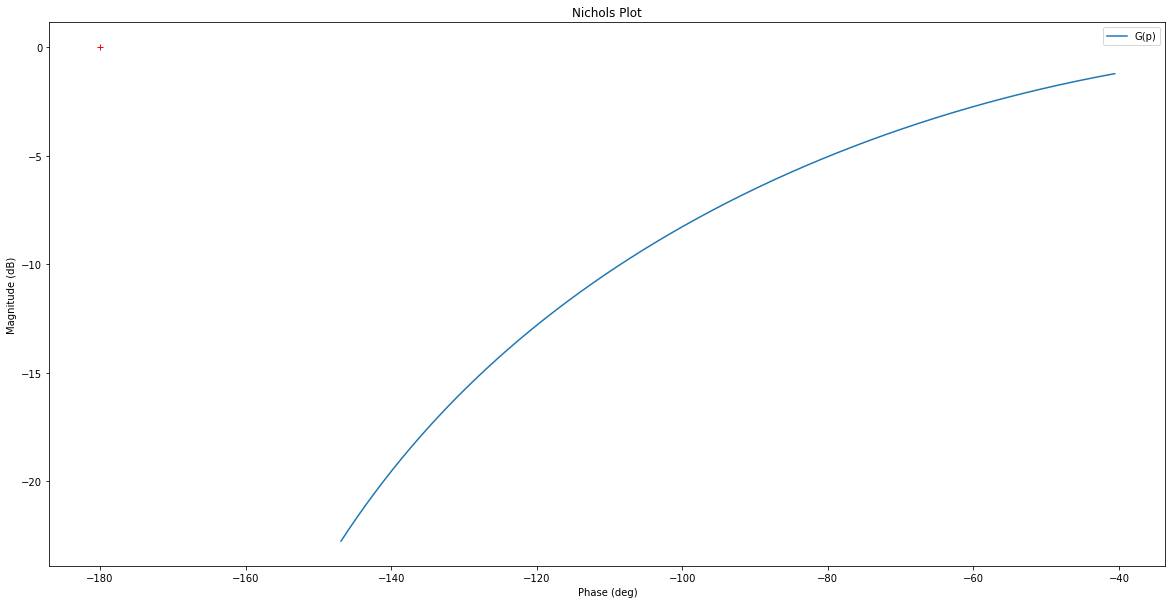

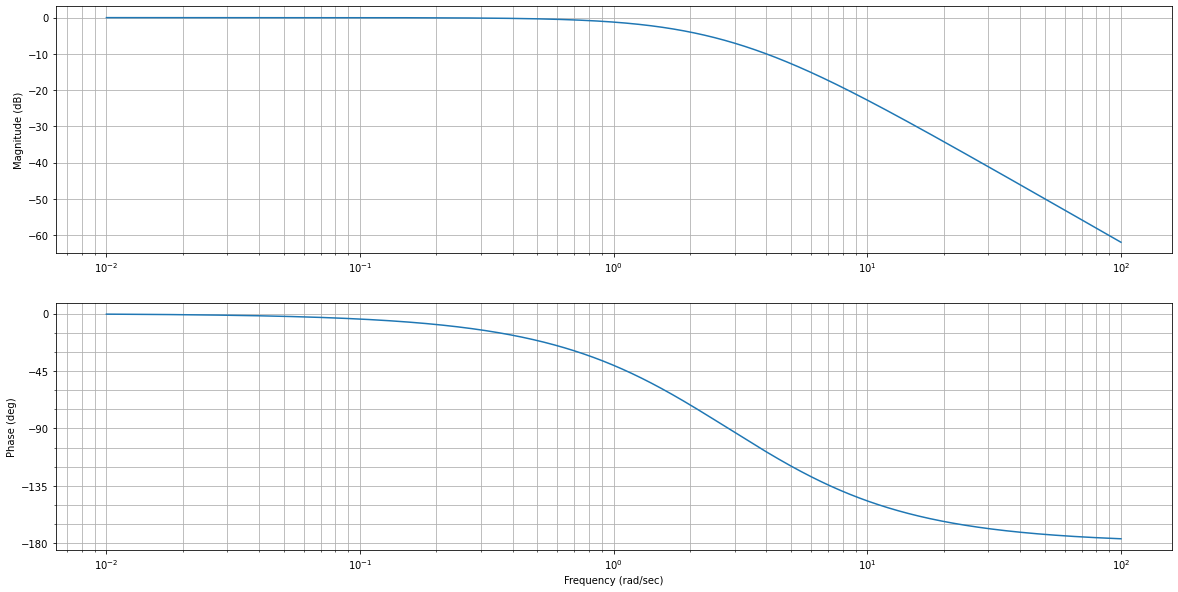

In [2]:
G1 = ml.tf(1, [0.5, 1])
G2 = ml.tf(1, [0.25, 1])
G = G1*G2

fig = plt.figure("Nichols", figsize=(20,10))
rlf.nichols(G, labels=['G(p)'], NameOfFigure = "Nichols")

fig = plt.figure("Bode", figsize=(20,10))
ax = fig.subplots()
mag, w = rlf.getValues(G, -135, printValue=True, NameOfFigure="Bode")

Kp = 1/mag  # Kp va à l'inverse de ce qu'on mesure
print("Kp =", Kp)

Visualisez l'effet sur la réponse indicielle:

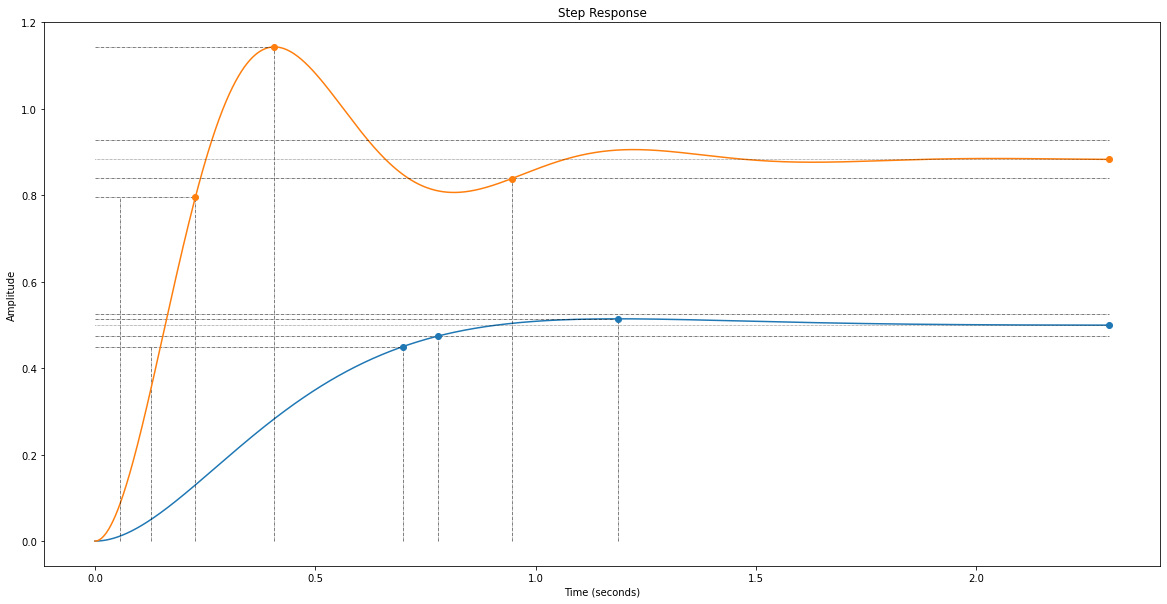

In [3]:
G_BF = ml.feedback(G, 1)
G_BF_Kp = ml.feedback(Kp*G, 1)

fig = plt.figure("Steps", figsize=(20,10))
rlf.stepWithInfo(G_BF, NameOfFigure="Steps")
rlf.stepWithInfo(G_BF_Kp, NameOfFigure="Steps");

### Limite de stabilité

Analysez le système asservi à retour unitaire dont la fonction de transfert de boucle ouverte est la
suivante (cf. p 7-11):

$$
G(p) = \frac{1}{(1+0,5p)*(1+4p)*(0.1p+1)}
$$

#### Nichols
Observez l’allure de $G_{BO}(p)$ sur le diagramme de Nichols et mesurez la marge de phase et la marge de gain ainsi que des pulsations correspondantes:
- $M_\Phi$ = ...
- $M_G$ = ...

:::{admonition} Astuce
:class: tip
Pour calculer la marge de gain et de phase d'un système, vous pouvez utiliser la fonction `margin` du package `control`.

**Exemple:**

    from control import matlab as ml
    G_BO = ml.tf(1, [1, 1])
    mg, mp, __, __ = ml.margin(G_BO)
:::

Marge de phase = inf° 
Marge de gain = 34.86235250429483 dB


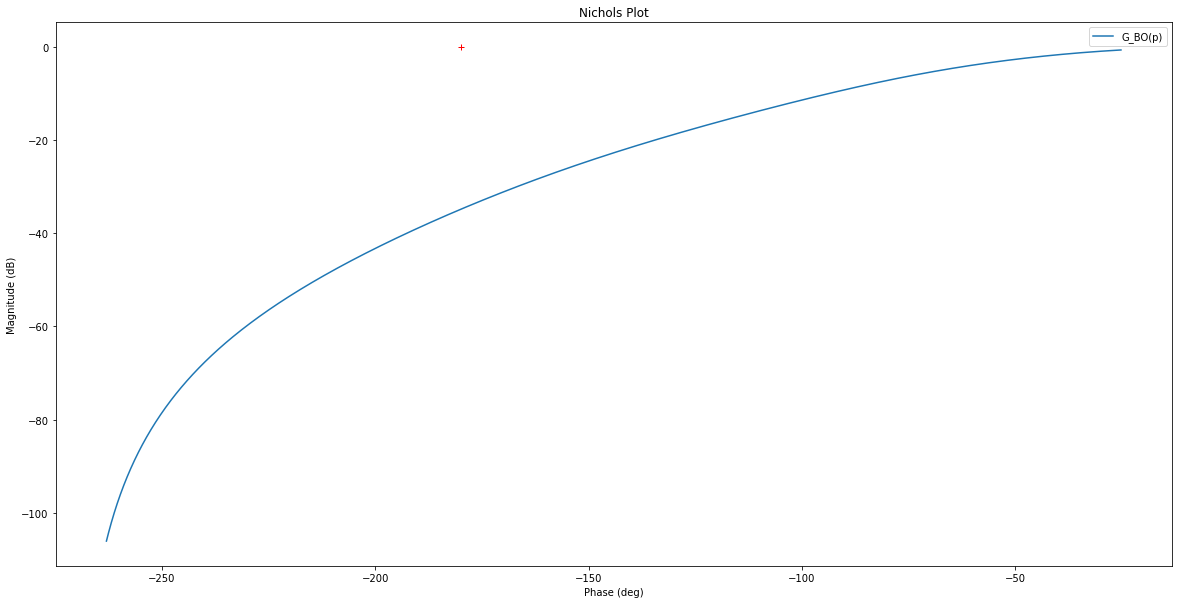

In [4]:
G1 = ml.tf(1, [0.5, 1])
G2 = ml.tf(1, [4, 1])
G3 = ml.tf(1, [0.1, 1])
G_BO = G1*G2*G3

fig = plt.figure("Nichols", figsize=(20,10))
rlf.nichols(G_BO, labels=['G_BO(p)'], NameOfFigure = "Nichols")

mg, mp, __, __ = ml.margin(G_BO)
mg = 20*np.log10(mg)  # Conversion de mg en dB
print("Marge de phase = {MP}° \nMarge de gain = {MG} dB".format(MP=mp, MG=mg))

Calculez la valeur critique de $K_p$ pour passer par le point « -1 » càd (0dB, -180°) : $K_p$ = ...

Kp = 55.349999999999994


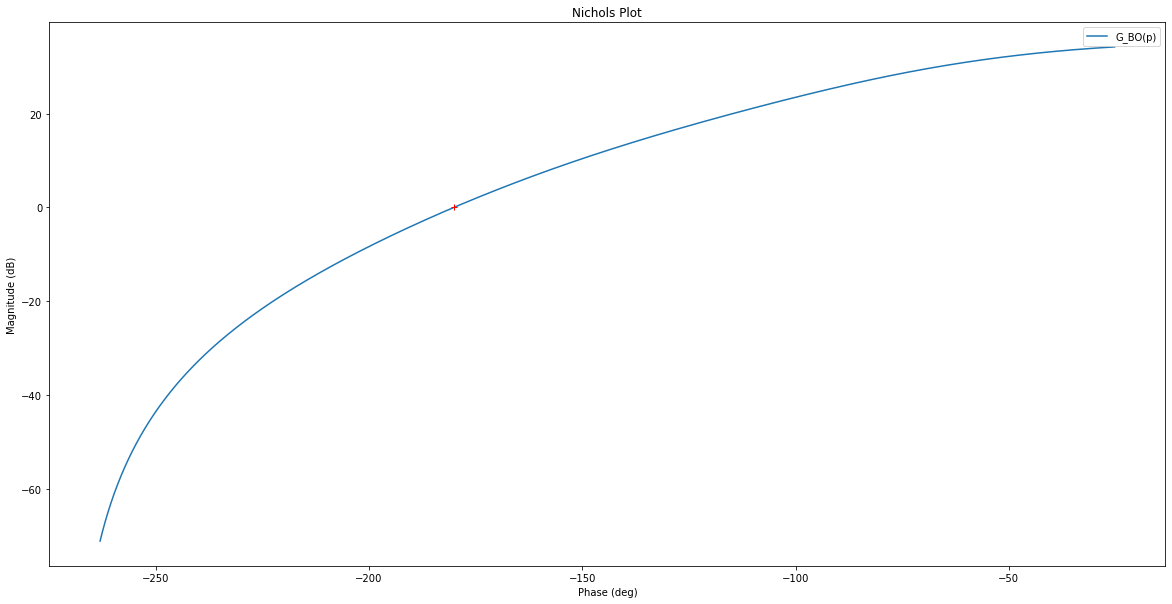

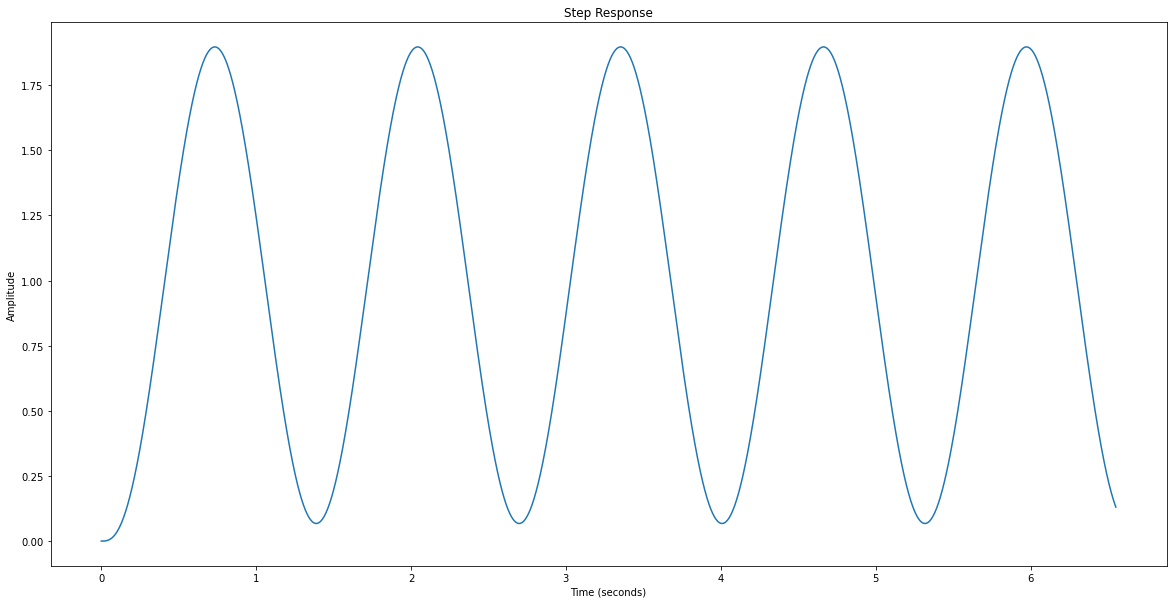

In [5]:
Kp = 10**(mg/20) # Kp ne doit pas être en dB => conversion
print("Kp =", Kp)

fig = plt.figure("Nichols", figsize=(20,10))
rlf.nichols(Kp*G_BO, labels=['G_BO(p)'], NameOfFigure = "Nichols")

G_BF= ml.feedback(Kp*G_BO)
fig = plt.figure("Steps", figsize=(20,10))
rlf.step_(G_BF, NameOfFigure="Steps");

#### Step

Avec $K_p = 54$, observez la réponse indicielle.

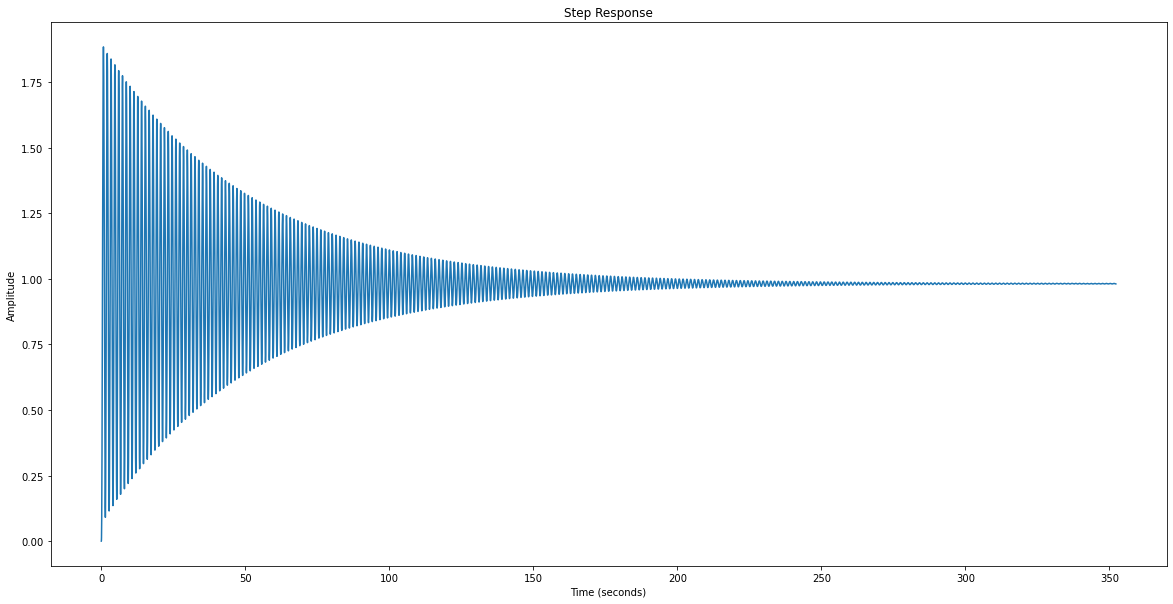

In [6]:
Kp = 54
G_BF= ml.feedback(Kp*G_BO)
fig = plt.figure("Steps", figsize=(20,10))
rlf.step_(G_BF, NameOfFigure="Steps");

Que se passe-t-il si on insère un correcteur proportionnel de gain $K_p = 56$ ?

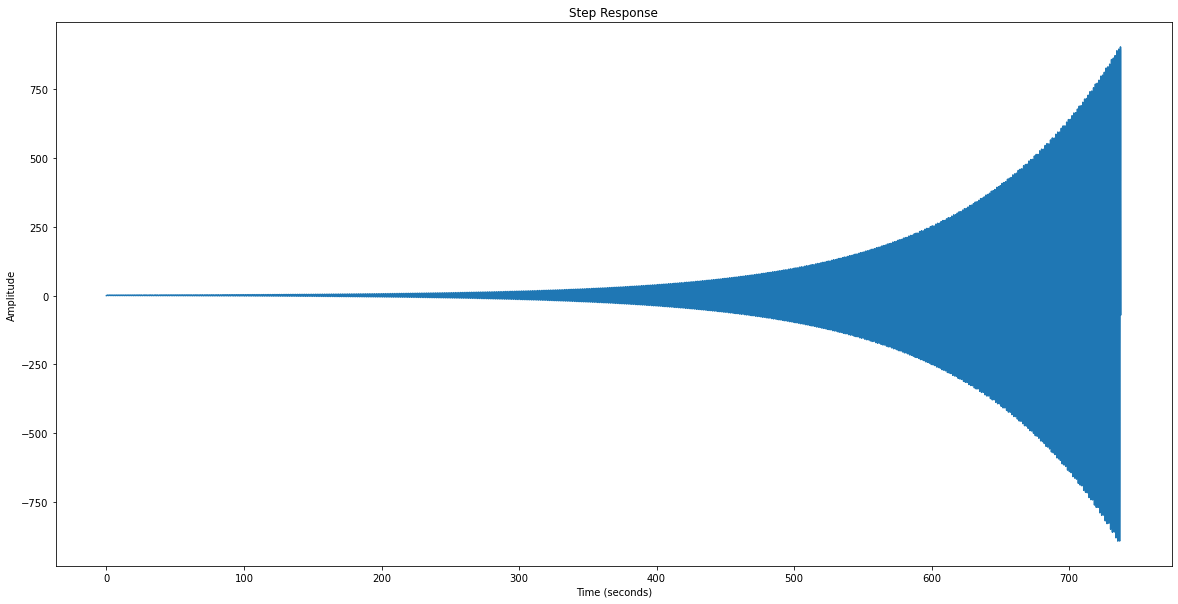

In [7]:
Kp = 56
G_BF= ml.feedback(Kp*G_BO)
fig = plt.figure("Steps", figsize=(20,10))
rlf.step_(G_BF, NameOfFigure="Steps");

Calculez $K_p$ pour obtenir une marge de phase de 45° :

:::{admonition} Astuce
:class: tip
Pour calculer la valeur du gain et/ou de la fréquence d'un système à une marge de phase donnée, vous pouvez utiliser la fonction `getValues` du package `ReguLabFct`.
:::

Gain à -135° = -20.136844108498554 dB
Fréquence à -135° = 1.8273687032470145 rad/sec
Kp = 10.158795207791778
Marge de phase = 45.016953712610814°


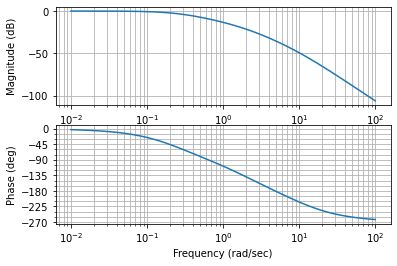

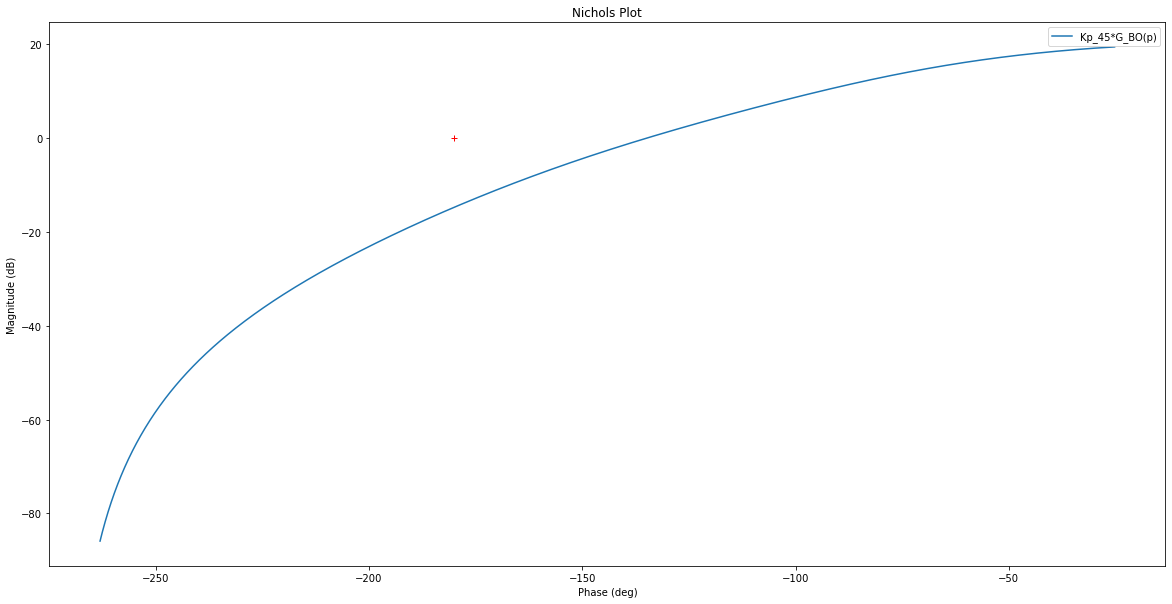

In [8]:
mag, w = rlf.getValues(G_BO, -135, NameOfFigure="Bode Gbo") # -135° car on souhaite regarder le gain du système en BO à 45° du point critique (-180°, 0dB)
Kp_45 = 1/mag  # Donne directement la valeur de l'amplitude => Pas besoin de la convertir à partir d'une valeur en dB + Kp va à l'inverse de ce qu'on mesure
print("Kp =", Kp_45)

fig = plt.figure("Nichols", figsize=(20,10))
rlf.nichols(Kp_45*G_BO, labels=['Kp_45*G_BO(p)'], NameOfFigure = "Nichols")
__, mp, __, __ = ml.margin(Kp_45*G_BO)
print("Marge de phase = {MP}°".format(MP=mp))

Calculez $K_p$ pour obtenir une marge de phase de 60° :

Gain à -120° = -16.200670408217633 dB
Fréquence à -120° = 1.3140499110790103 rad/sec
Kp = 6.457040648746092
Marge de phase = 59.97990291672397°


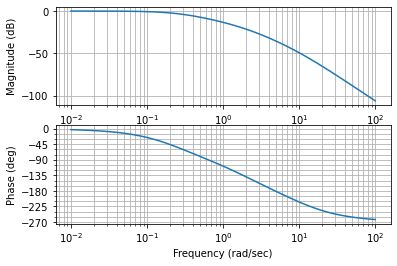

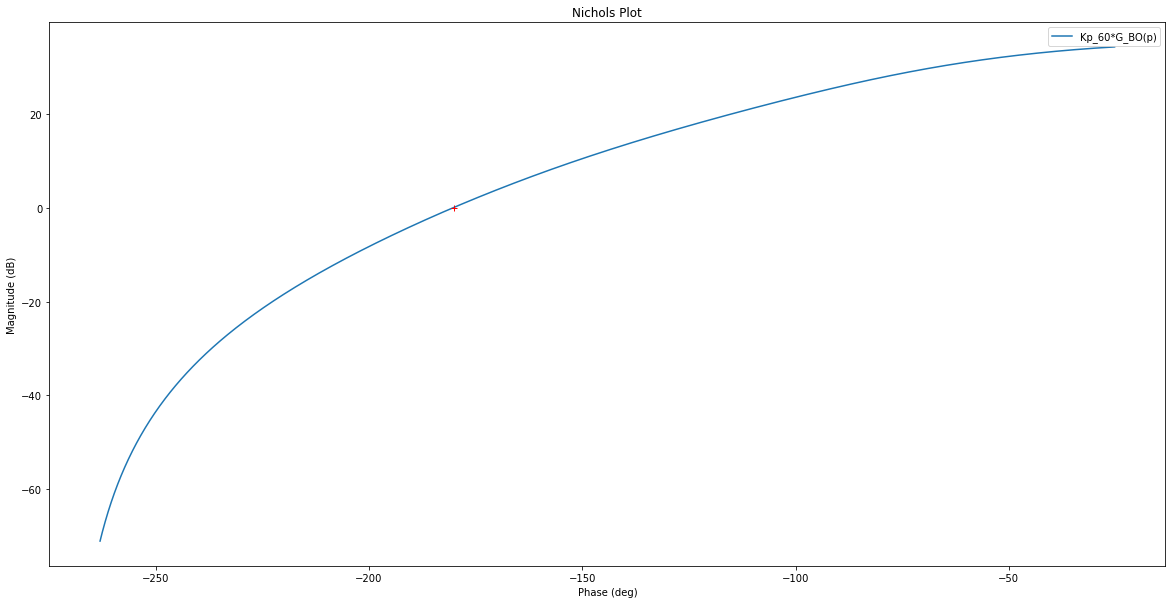

In [9]:
mag, w = rlf.getValues(G_BO, -120, NameOfFigure="Bode Gbo") # -120° car on souhaite regarder le gain du système en BO à 60° du point critique (-180°, 0dB)
Kp_60 = 1/mag  # Donne directement la valeur de l'amplitude => Pas besoin de la convertir à partir d'une valeur en dB + Kp va à l'inverse de ce qu'on mesure
print("Kp =", Kp_60)

fig = plt.figure("Nichols", figsize=(20,10))
rlf.nichols(Kp*G_BO, labels=['Kp_60*G_BO(p)'], NameOfFigure = "Nichols")
__, mp, __, __ = ml.margin(Kp_60*G_BO)
print("Marge de phase = {MP}°".format(MP=mp))

Et comparez les réponses indicielles respectives pour ces 2 marges typiques habituelles.

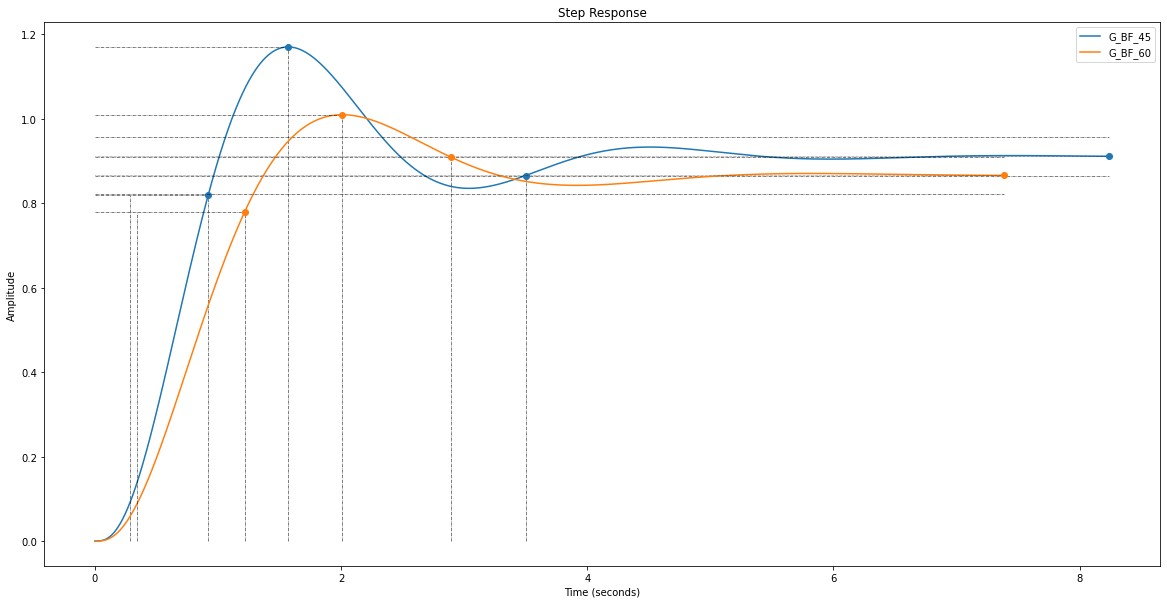

In [10]:
G_BF_45= ml.feedback(Kp_45*G_BO)
G_BF_60= ml.feedback(Kp_60*G_BO)
fig = plt.figure("Steps", figsize=(20,10))
rlf.stepWithInfo(G_BF_45, NameOfFigure="Steps", sysName='G_BF_45')
rlf.stepWithInfo(G_BF_60, NameOfFigure="Steps", sysName='G_BF_60');

[Facultatif] Faites l’exercice 2 page 7-4 et visualisez les calculs par une résolution graphique

[Facultatif] Faites aussi l’exercice 3.

[Facultatif] **application 1 : régulation de vitesse**

Tracez le diagramme de Nichols qui permette de déterminer graphiquement la valeur max de A pour minimiser l’erreur tout en
garantissant une marge de phase de 45° ou de 60° et comparez avec la solution A=100.

[Facultatif] **Régulation de position**

Tracez le diagramme de Nichols qui permette de déterminer graphiquement la valeur max de A pour minimiser l’erreur tout en
garantissant une marge de phase de 45°.

Comparez à la résolution temporelle …

Pour rappel, vous pouvez facilement obtenir les valeurs typiques d’une fonction d’ordre 2 grâce à la fonction `damp` du package `control`.

## Régulateur PI

### Système du $3^e$ ordre

Soit le système asservi à retour unitaire dont la fonction de boucle ouverte est :

$$
 G(p)=\frac{7500}{(p+4)(p+10)(p+500)}
$$

Ramenez le système à ses 2 pôles dominants.

:::{toggle}
Si on écrit G(p) sous sa forme canonique, on a:

$$
 G(p)=\frac{\frac{1}{4}*\frac{1}{10}*\frac{1}{500}*7500}{(\frac{1}{4}p+1)(\frac{1}{10}p+1)(\frac{1}{500}p+1)}
$$

$\Rightarrow$ Le pôle le moins dominant est celui dont la constante de temps est la plus faible, soit $\frac{1}{500}$. Dès lors, si on approxime G(p) à un système d'ordre 2 en retirant son pôle le moins dominant, on obtient:

$$
 G_{approx}(p)=\frac{0.375}{(\frac{1}{4}p+1)(\frac{1}{10}p+1)}
$$
:::

Vérifiez dans Nichols et sur la réponse indicielle.

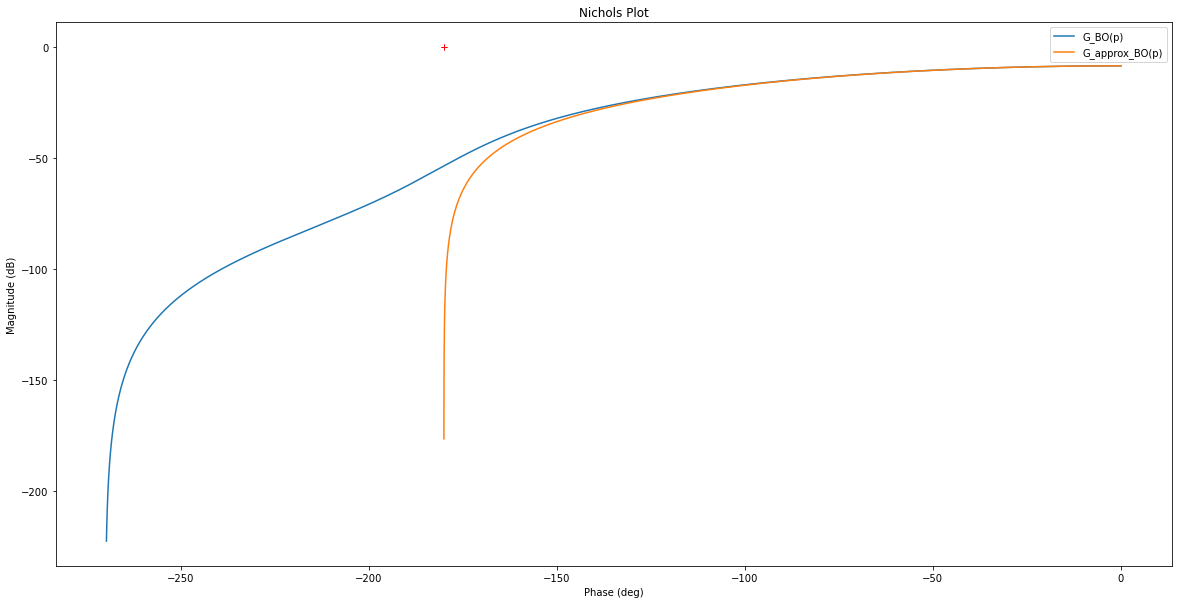

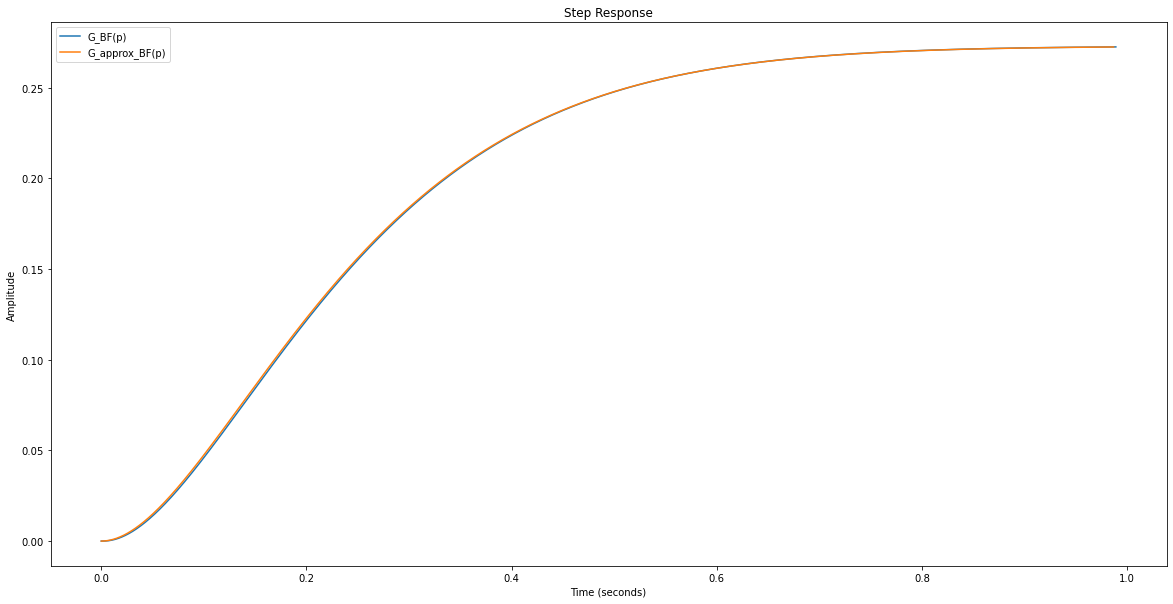

In [11]:
G1 = ml.tf(7500/4/10/500, [1/4, 1])
G2 = ml.tf(1, [1/10, 1])
G3 = ml.tf(1, [1/500, 1])
G = G1*G2*G3
G_approx = G1*G2

# Nichols
fig = plt.figure("Nichols", figsize=(20,10))
frequencies = np.linspace(10**-5, 10**5, 10**6) # Pour bien voir vers où on converge dans les hautes fréquences (jusqu'à 10^5 rad/s ici)
rlf.nichols(G, labels=['G_BO(p)'], NameOfFigure = "Nichols", omega=frequencies)
rlf.nichols(G_approx, labels=['G_approx_BO(p)'], NameOfFigure = "Nichols", omega=frequencies)

# Réponse indicielle
G_BF = ml.feedback(G, 1)
G_approx_BF = ml.feedback(G_approx, 1)

fig = plt.figure("Steps", figsize=(20,10))
rlf.step_(G_BF, NameOfFigure="Steps", sysName='G_BF(p)')
rlf.step_(G_approx_BF, NameOfFigure="Steps", sysName='G_approx_BF(p)');

On demande de déterminer le correcteur PI dont le but est d’annuler l’erreur en régime permanent tout en
assurant une réponse indicielle dont le dépassement est limité à 10% (tablez ici sur une marge de phase de 60°).
- Par la méthode du pôle dominant
- Par la méthode de placement fréquentiel

Tracez le diagramme de Nichols ainsi corrigé pour le système réel et pour le système ramené à 2 pôles dominants.

Tracez également les 2 réponses indicielles.

#### Méthode de compensation du pôle dominant (*cf. p. 7-8*)

Il faut tout d'abord lire la valeur du gain lorsqu'on est à 60° de marge de phase (= gain à 60° du point d'instabilitité (0, -180°)). Cela peut se faire grâce à la fonction `getValues` du package `ReguLabFct`.

Valeurs pour G_BO:
Gain à -120° = -21.547793018711413 dB
Fréquence à -120° = 11.228067905278133 rad/sec


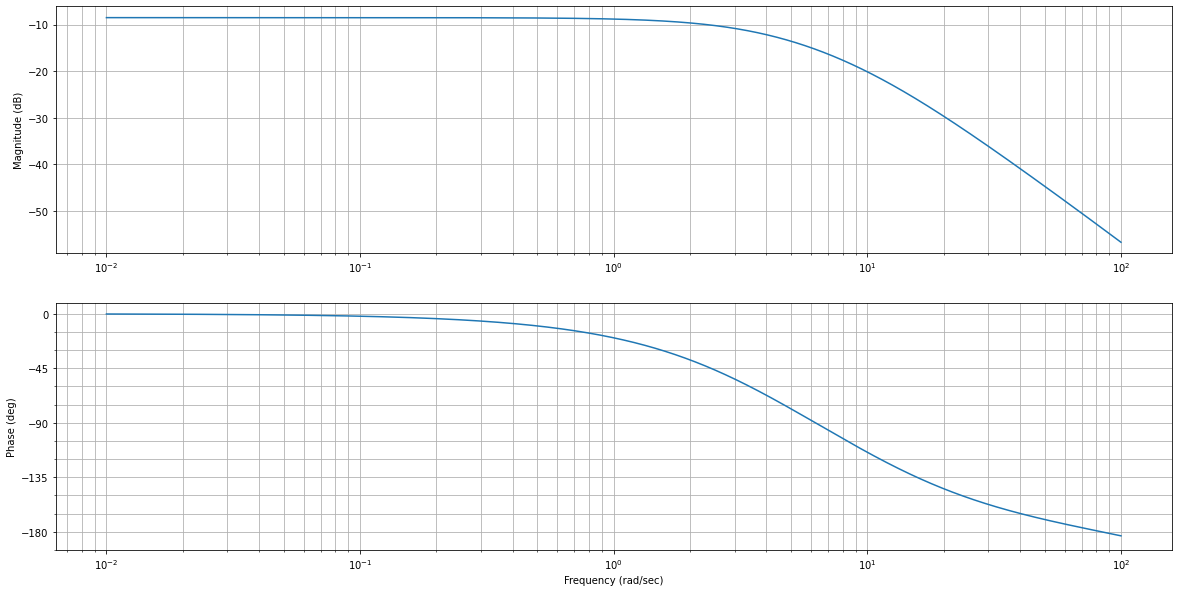

In [12]:
# Lecture phase
fig = plt.figure("Bode G_BO", figsize=(20,10))
print("Valeurs pour G_BO:")
mag, w = rlf.getValues(G, -180+60, NameOfFigure="Bode G_BO")

On peut ensuite en déterminer $K_P$ en faisant bien attention que le gain mesuré est en dB et qu'il faut s'y opposer pour atteindre une valeur de 0 dB.

$$\Rightarrow 20*\log(K_P) = 21.55$$

Pour trouver $\tau_I$, on sait que notre pôle dominant est égale à -4. Dès lors, on fixe $\tau_I=\frac{1}{4}$ secondes. 

Maintenant que nous connaissons les paramètres $K_P$ et $\tau_I$ de notre correcteur **PI**, il ne reste plus qu'à implémenter ce dernier! Ceci se fait ainsi en code python:

Marge de phase système original corrigé par Kp = 60.002672421161435 °
Marge de phase système original corrigé par PI = 39.26601808288612 °
Marge de phase système approx corrigé par PI = 40.59772796407222 °

Dépassement système original corrigé par PI = 29.78759795427306 %
Dépassement système approx corrigé par PI = 28.22222058770889 %


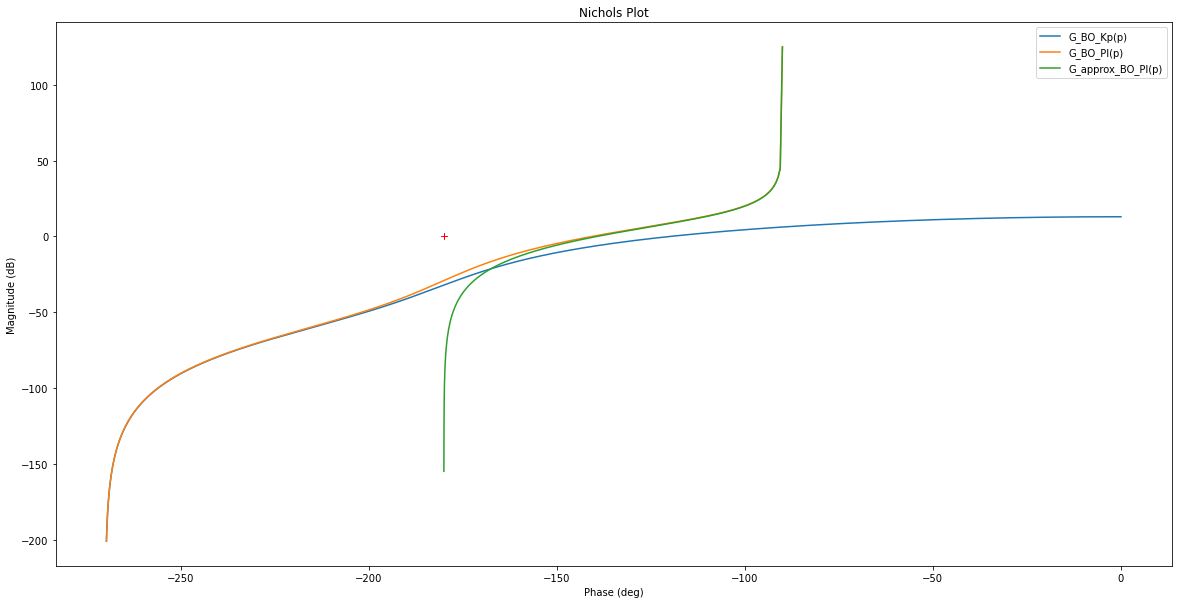

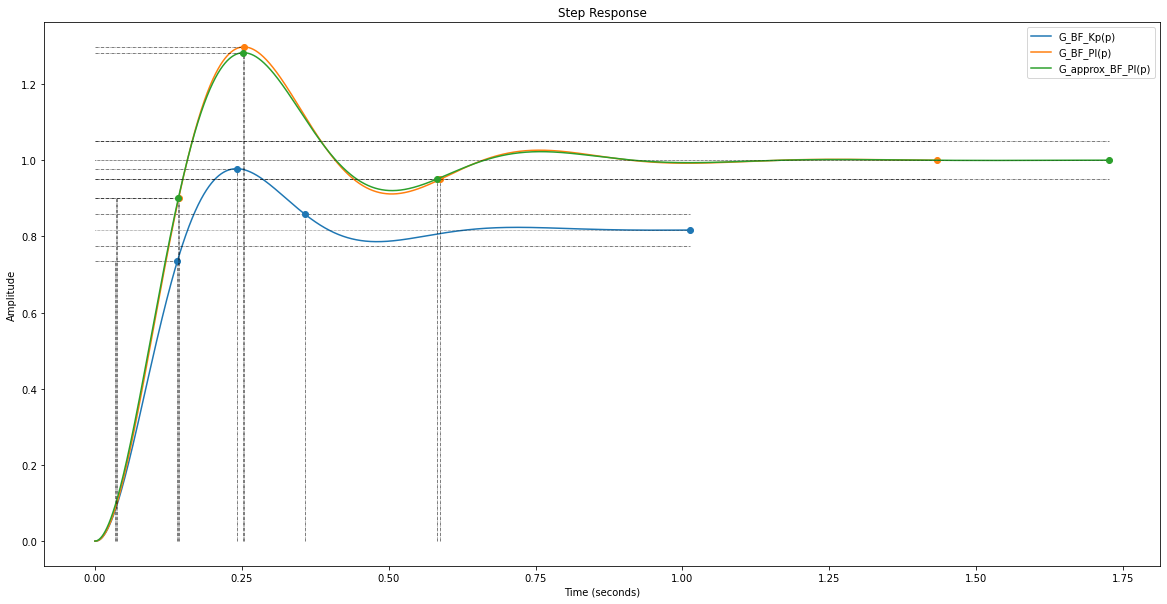

In [13]:
Kp = 10**(21.55/20)

tI = 1/4
C_I = ml.tf([tI, 1],[tI, 0])

G_BO_PI = Kp*C_I*G
G_approx_BO_PI = Kp*C_I*G_approx

# Nichols
fig = plt.figure("Nichols - Pôles dominants", figsize=(20,10))
frequencies = np.linspace(10**-5, 10**5, 10**6) # Pour bien voir vers où on converge dans les hautes fréquences (jusqu'à 10^5 rad/s ici)
rlf.nichols(Kp*G, labels=['G_BO_Kp(p)'], NameOfFigure = "Nichols - Pôles dominants", omega=frequencies)
rlf.nichols(G_BO_PI, labels=['G_BO_PI(p)'], NameOfFigure = "Nichols - Pôles dominants", omega=frequencies)
rlf.nichols(G_approx_BO_PI, labels=['G_approx_BO_PI(p)'], NameOfFigure = "Nichols - Pôles dominants", omega=frequencies)

# Réponse indicielle
G_BF_Kp = ml.feedback(Kp*G, 1)
G_BF_PI = ml.feedback(G_BO_PI, 1)
G_approx_BF_PI = ml.feedback(G_approx_BO_PI, 1)

fig = plt.figure("Steps - Pôles dominants", figsize=(20,10))
info = rlf.stepWithInfo(G_BF_Kp, NameOfFigure="Steps - Pôles dominants", sysName='G_BF_Kp(p)')
info = rlf.stepWithInfo(G_BF_PI, NameOfFigure="Steps - Pôles dominants", sysName='G_BF_PI(p)')
info_approx = rlf.stepWithInfo(G_approx_BF_PI, NameOfFigure="Steps - Pôles dominants", sysName='G_approx_BF_PI(p)');

# Pour vérifier que la marge de phase est bonne
mg, mp, __, __ = ml.margin(Kp*G)
print("Marge de phase système original corrigé par Kp =", mp, "°")
mg, mp, __, __ = ml.margin(G_BO_PI)
print("Marge de phase système original corrigé par PI =", mp, "°")
mg, mp, __, __ = ml.margin(G_approx_BO_PI)
print("Marge de phase système approx corrigé par PI =", mp, "°\n")

# Dépassement
print("Dépassement système original corrigé par PI =", info.Overshoot, "%")
print("Dépassement système approx corrigé par PI =", info_approx.Overshoot, "%")

On remarque que bien que le $K_P$ ait corrigé correctement le système donné (on a bien 60° de marge de phase), ceci n'est plus la cas lorsqu'on ajoute le correcteur **I** (on obtient un marge de phase d'environ 40°)... Il faut donc réitérer l'opération en rajoutant un $K_P$ supplémentaire afin de descendre la courbe de Nichols du système et ainsi garantir une marge de phase de 60°.

Valeurs pour G_BO_PI:
Gain à -120° = 8.871141985102017 dB
Fréquence à -120° = 5.626975542423636 rad/sec


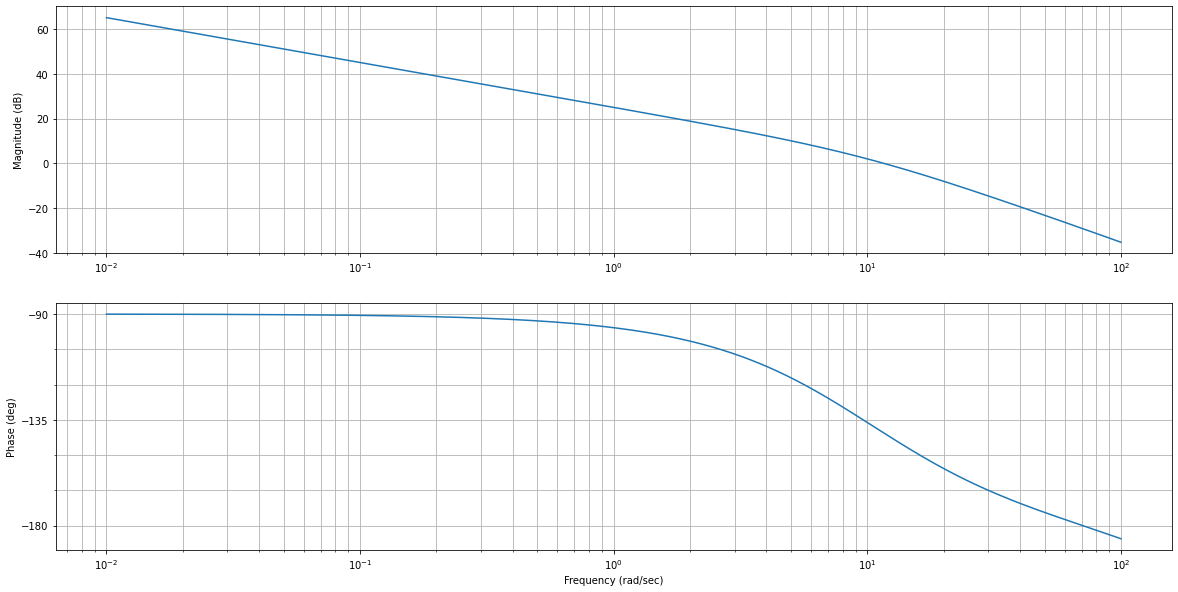

In [14]:
# Lecture phase
fig = plt.figure("Bode G_BO_PI", figsize=(20,10))
print("Valeurs pour G_BO_PI:")
mag, w = rlf.getValues(G_BO_PI, -180+60, NameOfFigure="Bode G_BO_PI")

On peut ensuite en déterminer $K_{P_2}$ en faisant bien attention que le gain mesuré est en dB et qu'il faut s'y opposer pour atteindre une valeur de 0dB.

$$\Rightarrow 20*\log(K_{P_2}) = -8.87$$

En utilisant ce nouveau $K_P$, on otbient:

Marge de phase système original corrigé par PI = 59.98620867072418 °
Marge de phase système approx corrigé par PI = 60.62980341859122 °

Dépassement système original corrigé par PI = 8.62957544136842 %
Dépassement système approx corrigé par PI = 8.21695174458501 %


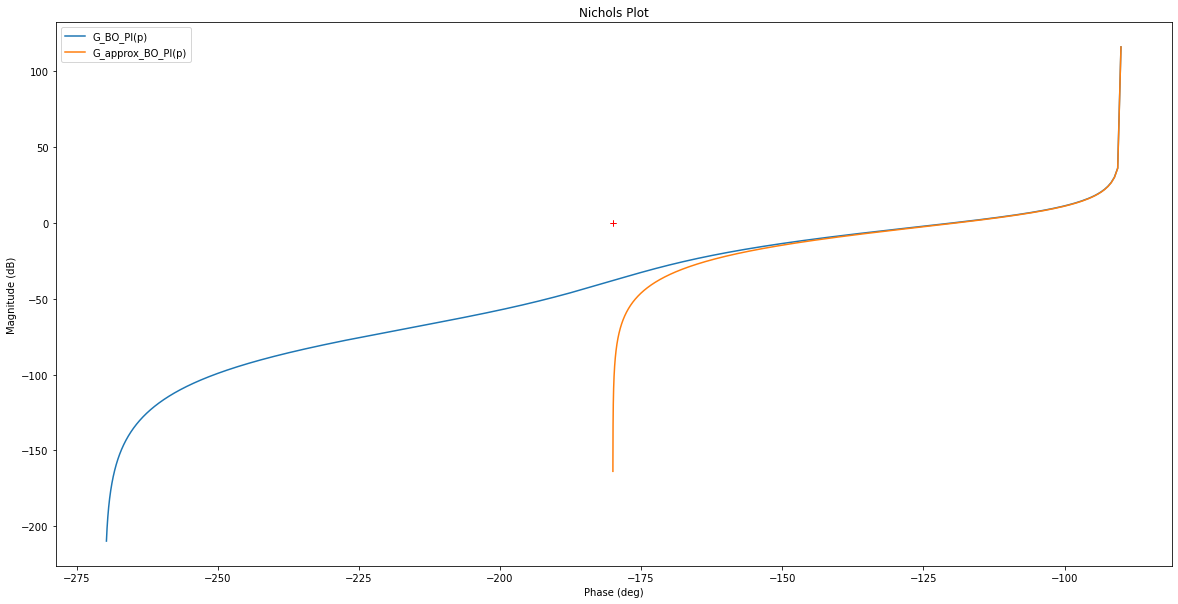

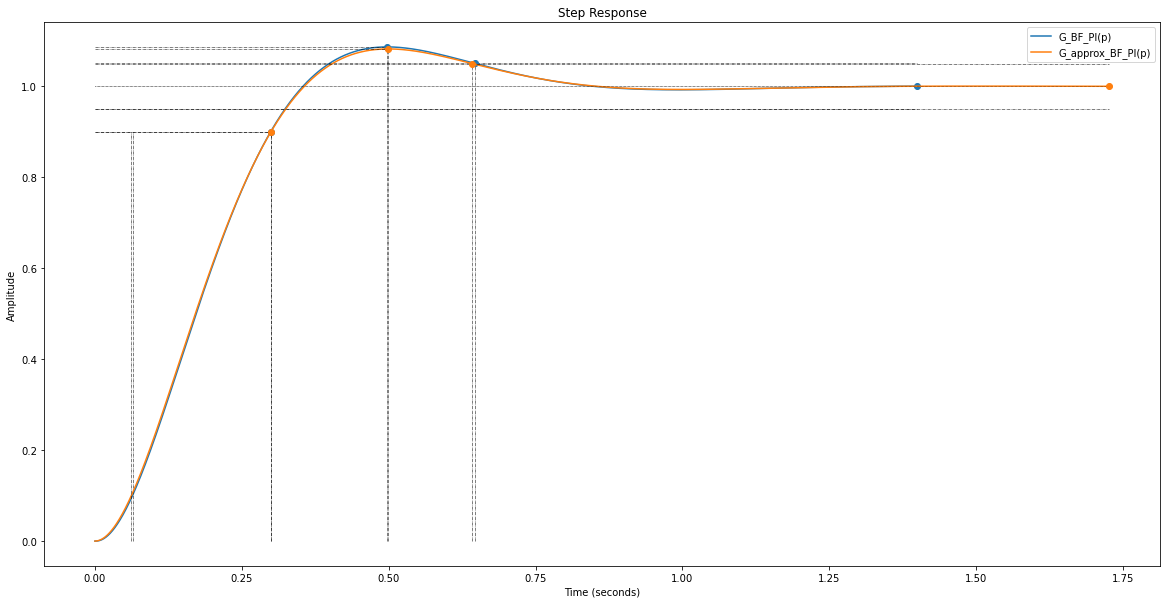

In [15]:
Kp_1 = Kp
Kp_2 = 10**(-8.87/20)
Kp = Kp_1*Kp_2

tI = 1/4
C_I = ml.tf([tI, 1],[tI, 0])

G_BO_PI = Kp*C_I*G
G_approx_BO_PI = Kp*C_I*G_approx

# Nichols
fig = plt.figure("Nichols - Pôles dominants", figsize=(20,10))
frequencies = np.linspace(10**-5, 10**5, 10**6) # Pour bien voir vers où on converge dans les hautes fréquences (jusqu'à 10^5 rad/s ici)
rlf.nichols(G_BO_PI, labels=['G_BO_PI(p)'], NameOfFigure = "Nichols - Pôles dominants", omega=frequencies)
rlf.nichols(G_approx_BO_PI, labels=['G_approx_BO_PI(p)'], NameOfFigure = "Nichols - Pôles dominants", omega=frequencies)

# Réponse indicielle
G_BF_PI = ml.feedback(G_BO_PI, 1)
G_approx_BF_PI = ml.feedback(G_approx_BO_PI, 1)

fig = plt.figure("Steps - Pôles dominants", figsize=(20,10))
info = rlf.stepWithInfo(G_BF_PI, NameOfFigure="Steps - Pôles dominants", sysName='G_BF_PI(p)')
info_approx = rlf.stepWithInfo(G_approx_BF_PI, NameOfFigure="Steps - Pôles dominants", sysName='G_approx_BF_PI(p)');

# Pour vérifier que la marge de phase est bonne
mg, mp, __, __ = ml.margin(G_BO_PI)
print("Marge de phase système original corrigé par PI =", mp, "°")
mg, mp, __, __ = ml.margin(G_approx_BO_PI)
print("Marge de phase système approx corrigé par PI =", mp, "°\n")

# Dépassement
print("Dépassement système original corrigé par PI =", info.Overshoot, "%")
print("Dépassement système approx corrigé par PI =", info_approx.Overshoot, "%")

La marge de phase conseillée ici (60°) est maintenant bonne et on observe bien un dépassement inférieur à 10 %.

#### Méthode de placement fréquentiel (*cf. p. 7-8*)

La méthode du **placement fréquentiel** consiste à trouver la pulsation critique (= pulsation à laquelle le gain vaut 0 dB) et de choisir un $\tau_I>\frac{10}{\omega_{critique}}$ afin que le correcteur **PI** n'agisse qu'en-deçà de cette pulsation critique.

Comme pour la méthode de compensation du pôle dominant, la première chose à faire est de trouver le $K_P$ permettant d'assurer la marge de phase souhaitée.

Valeurs pour Kp*G:
Gain à -120° = 0.0022069812885906277 dB
Fréquence à -120° = 11.228067905278133 rad/sec


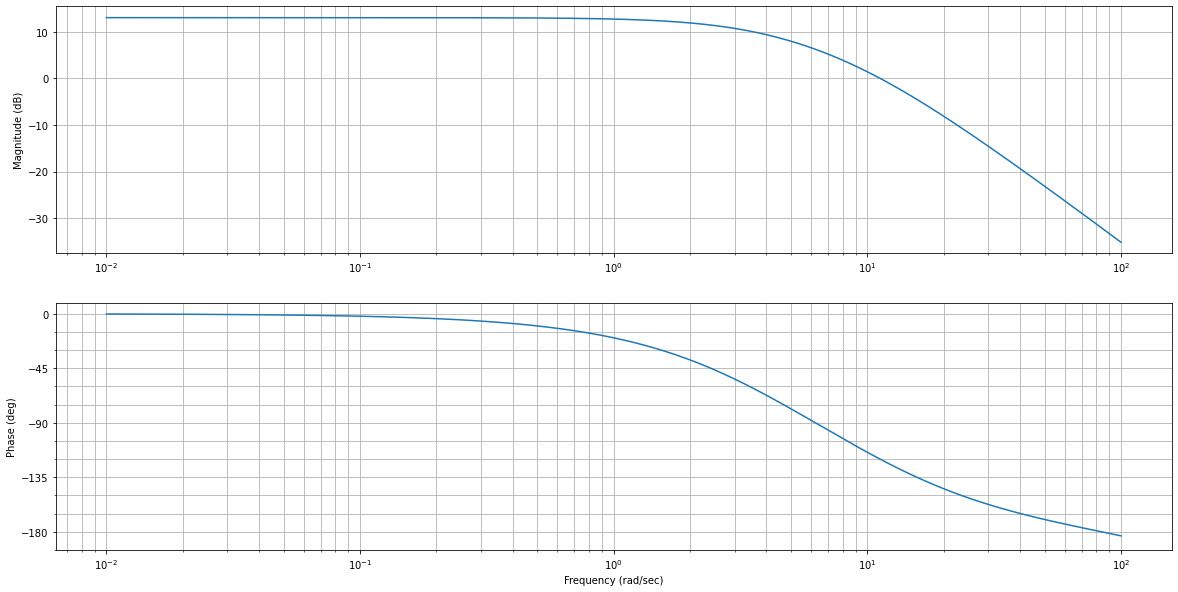

In [16]:
Kp = Kp_1 # On reprend le même Kp que lors de la première étape lors de la technique du pôle dominant puisqu'on souhaite obtenir la même marge de phase (60°).

# Lecture de la fréquence à la phase souhaitée
fig = plt.figure("Bode G_BO", figsize=(20,10))
print("Valeurs pour Kp*G:")
mag, w = rlf.getValues(Kp*G, -180+60, NameOfFigure="Bode G_BO")

On remarque que la fréqence du système à -120° reste la même que pour le système non corrigé (cf. début de la méthode de la compensation du pôle dominant). Le $K_P$ n'a donc pas d'effet sur la fréquence du système. On prend donc $\omega_{critique} = 11.23$ rad/s.

Puisqu'on ne veut pas que le correcteur **I** agisse au-delà de cette pulsation critique, on fixe $\tau_I=\frac{10}{\omega_{critique}}$.

Marge de phase système original corrigé par PI = 54.1481040558113 °
Marge de phase système approx corrigé par PI = 55.43203927473394 °

Dépassement système original corrigé par PI = 7.436335076107414 %
Dépassement système approx corrigé par PI = 6.423418111859536 %


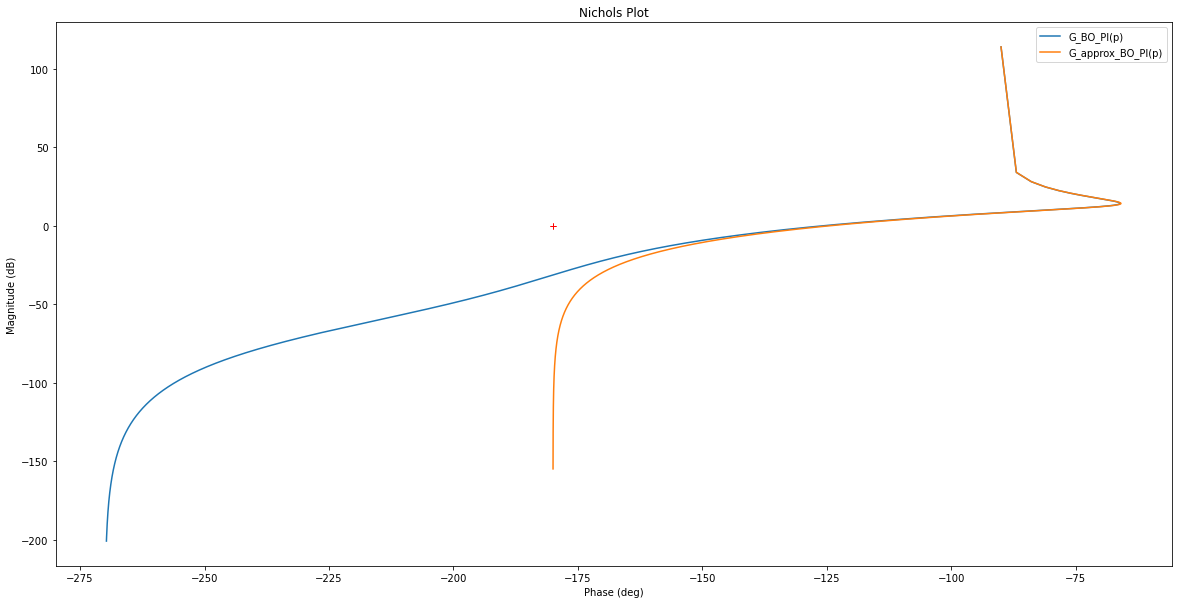

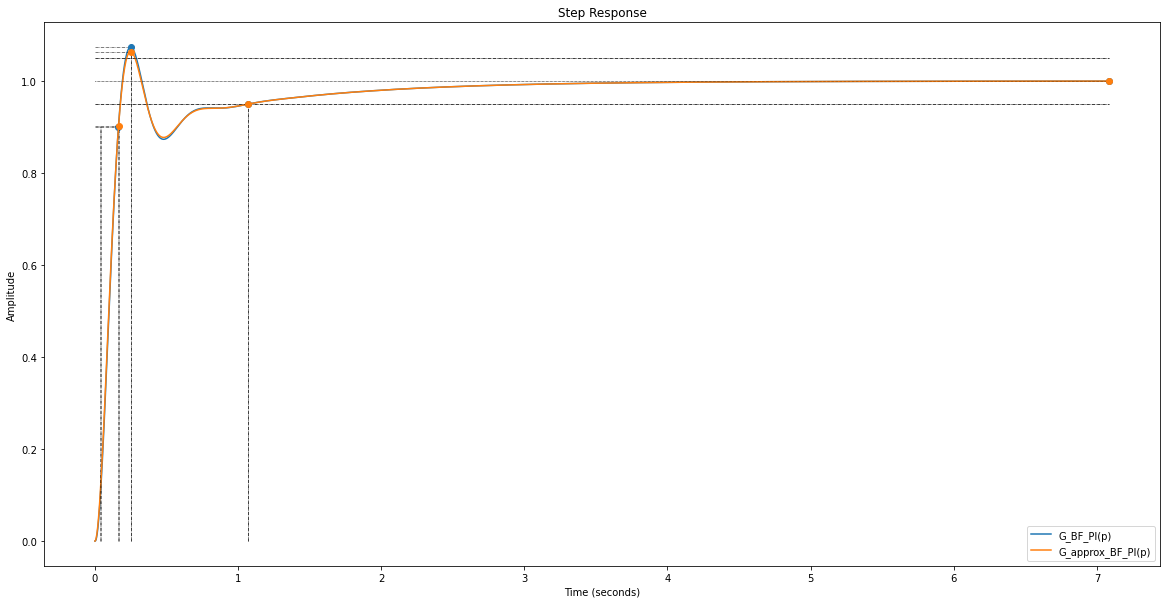

In [17]:
w_crit = 11.23
tI = 10/w_crit
C_I = ml.tf([tI, 1],[tI, 0])

G_BO_PI = Kp*C_I*G
G_approx_BO_PI = Kp*C_I*G_approx

# Nichols
fig = plt.figure("Nichols - Placement fréquentiel", figsize=(20,10))
frequencies = np.linspace(10**-5, 10**5, 10**6) # Pour bien voir vers où on converge dans les hautes fréquences (jusqu'à 10^5 rad/s ici)
rlf.nichols(G_BO_PI, labels=['G_BO_PI(p)'], NameOfFigure = "Nichols - Placement fréquentiel", omega=frequencies)
rlf.nichols(G_approx_BO_PI, labels=['G_approx_BO_PI(p)'], NameOfFigure = "Nichols - Placement fréquentiel", omega=frequencies)

# Réponse indicielle
G_BF_PI = ml.feedback(G_BO_PI, 1)
G_approx_BF_PI = ml.feedback(G_approx_BO_PI, 1)

fig = plt.figure("Steps - Placement fréquentiel", figsize=(20,10))
info = rlf.stepWithInfo(G_BF_PI, NameOfFigure="Steps - Placement fréquentiel", sysName='G_BF_PI(p)')
info_approx = rlf.stepWithInfo(G_approx_BF_PI, NameOfFigure="Steps - Placement fréquentiel", sysName='G_approx_BF_PI(p)');

# Pour vérifier que la marge de phase est bonne
mg, mp, __, __ = ml.margin(G_BO_PI)
print("Marge de phase système original corrigé par PI =", mp, "°")
mg, mp, __, __ = ml.margin(G_approx_BO_PI)
print("Marge de phase système approx corrigé par PI =", mp, "°\n")

# Dépassement
print("Dépassement système original corrigé par PI =", info.Overshoot, "%")
print("Dépassement système approx corrigé par PI =", info_approx.Overshoot, "%")

:::{note}
On remarque qu'on peut se permettre d'avoir une marge de phase plus petite puisque le dépassement mesuré est assez faible par rapport aux 10% tolérés. On peut donc diminuer $\tau_I$ en augmentant $\omega_{critique}$ par essais-erreurs.
On obtient par exemple le résultat qui suit pour une $\omega_{critique}$ de 14$ rad/s.
:::

Marge de phase système original corrigé par PI = 52.68146300555324 °
Marge de phase système approx corrigé par PI = 53.96804155763064 °

Dépassement système original corrigé par PI = 9.751797844366417 %
Dépassement système approx corrigé par PI = 8.697008718328437 %


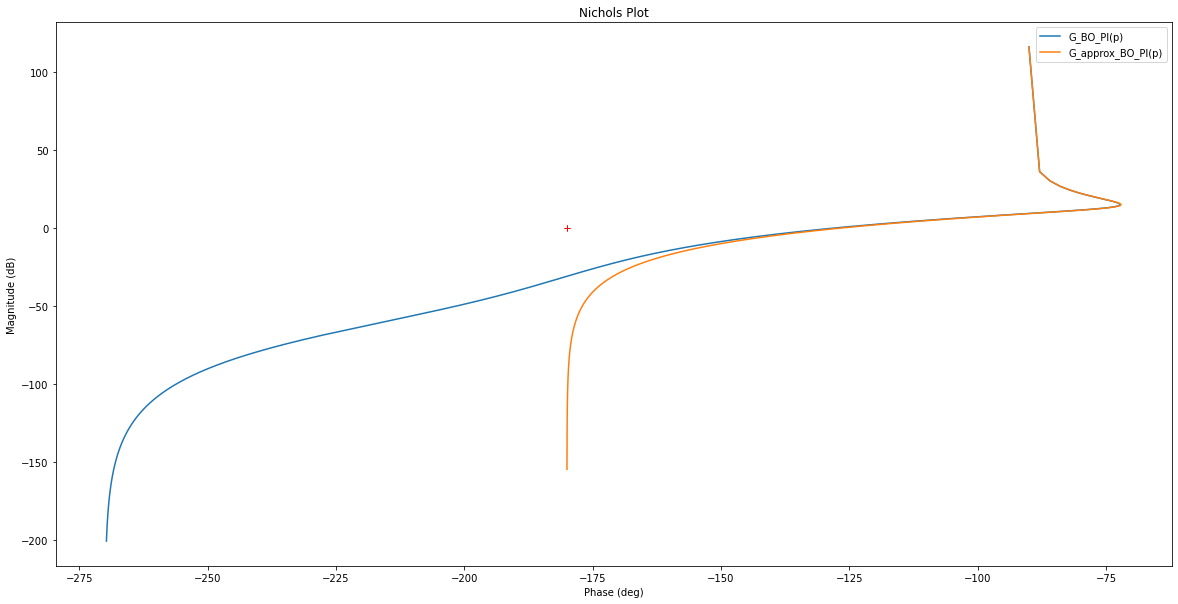

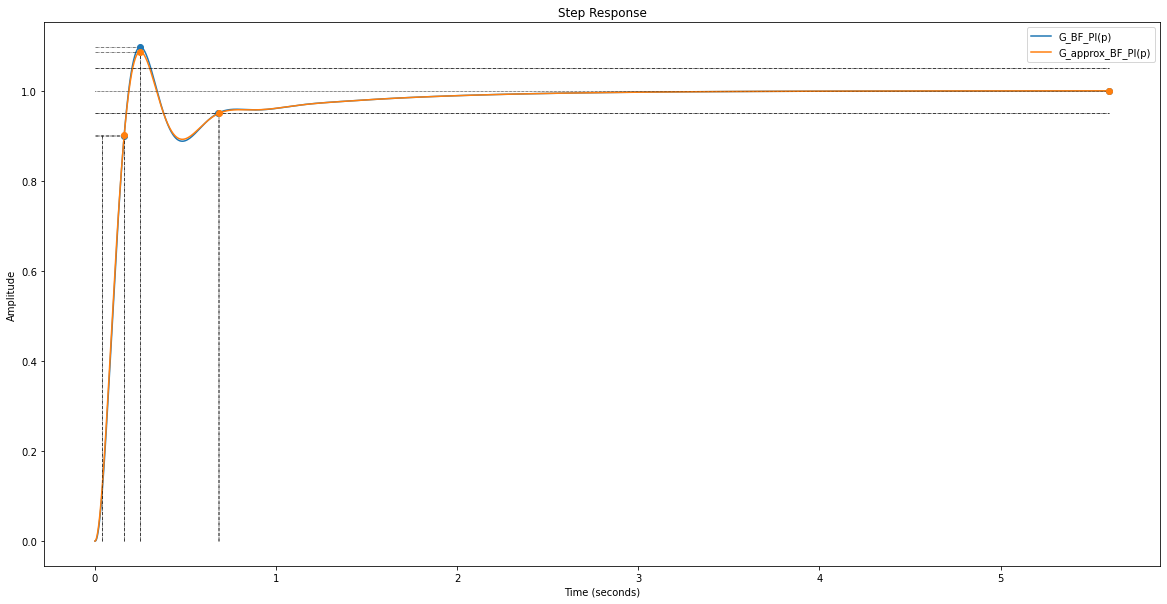

In [18]:
w_crit = 14
tI = 10/w_crit
C_I = ml.tf([tI, 1],[tI, 0])

G_BO_PI = Kp*C_I*G
G_approx_BO_PI = Kp*C_I*G_approx

# Nichols
fig = plt.figure("Nichols - Placement fréquentiel", figsize=(20,10))
frequencies = np.linspace(10**-5, 10**5, 10**6) # Pour bien voir vers où on converge dans les hautes fréquences (jusqu'à 10^5 rad/s ici)
rlf.nichols(G_BO_PI, labels=['G_BO_PI(p)'], NameOfFigure = "Nichols - Placement fréquentiel", omega=frequencies)
rlf.nichols(G_approx_BO_PI, labels=['G_approx_BO_PI(p)'], NameOfFigure = "Nichols - Placement fréquentiel", omega=frequencies)

# Réponse indicielle
G_BF_PI = ml.feedback(G_BO_PI, 1)
G_approx_BF_PI = ml.feedback(G_approx_BO_PI, 1)

fig = plt.figure("Steps - Placement fréquentiel", figsize=(20,10))
info = rlf.stepWithInfo(G_BF_PI, NameOfFigure="Steps - Placement fréquentiel", sysName='G_BF_PI(p)')
info_approx = rlf.stepWithInfo(G_approx_BF_PI, NameOfFigure="Steps - Placement fréquentiel", sysName='G_approx_BF_PI(p)');

# Pour vérifier que la marge de phase est bonne
mg, mp, __, __ = ml.margin(G_BO_PI)
print("Marge de phase système original corrigé par PI =", mp, "°")
mg, mp, __, __ = ml.margin(G_approx_BO_PI)
print("Marge de phase système approx corrigé par PI =", mp, "°\n")

# Dépassement
print("Dépassement système original corrigé par PI =", info.Overshoot, "%")
print("Dépassement système approx corrigé par PI =", info_approx.Overshoot, "%")

Observations: ...

### Construction du diagramme de Bode : effet pôle/zéro

Construction de la fonction de transfert d’un correcteur PI de la page 7-8 :

$$
C_{PI}(p)=K_p*\frac{1+\tau_I*p}{\tau_I*p}
$$

Prenez $K_p$ = 10 et $\tau_I$ = 1s

Tracez l'effet:
- de $K_p$
- du zéro: $f_1=1+p\tau_I$

  et observez l'influence d'un zéro de la fonction de transfert lorsque $\omega<<<\frac{1}{\tau_I}$ et  $\omega>>>\frac{1}{\tau_I}$ $\Rightarrow$ **synthèse sur l’effet d’un zéro à la page 4-16 !**

- du pôle: $f_2=\frac{1}{p\tau_I}$

  et observez l'influence d'un pôle à l'origine
  
$\Rightarrow$ Observez la construction de la fonction $C_{PI}$ par morceaux

$\Rightarrow$ Observez qu’en HF, le pôle compense le zéro

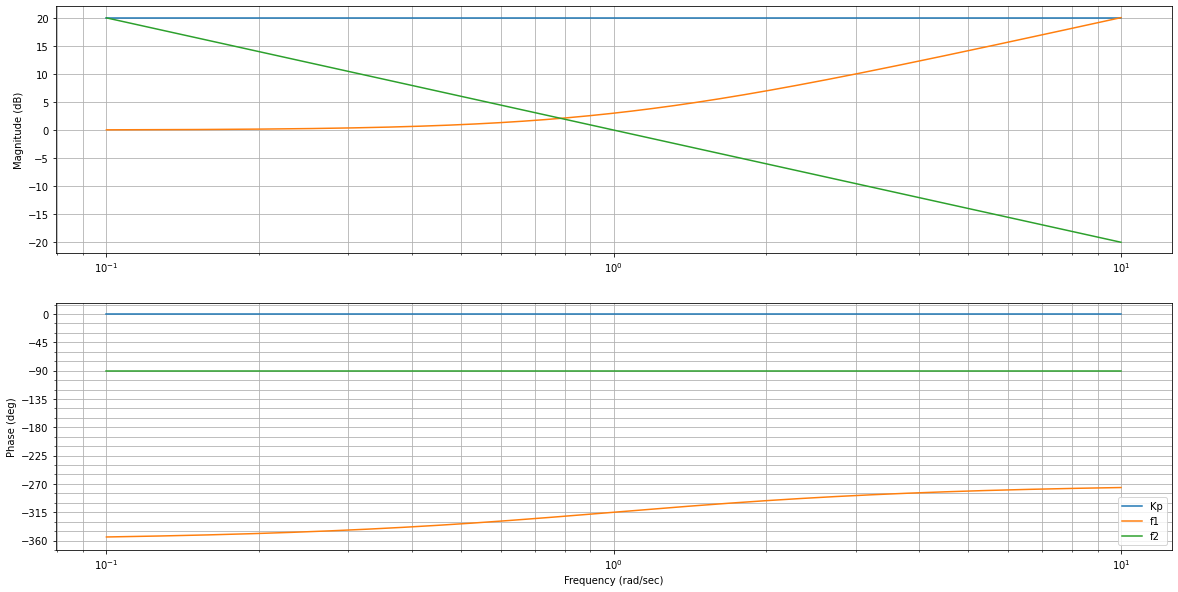

In [19]:
Kp = 10
tI = 1
f_Kp = ml.tf(Kp, 1)
f1 = ml.tf([tI, 1], [1])
f2 = ml.tf([1], [tI, 0])

fig = plt.figure("", figsize=(20,10))
ml.bode(f_Kp)
ml.bode(f1)
ml.bode(f2)
plt.legend(['Kp', 'f1', 'f2']);

[Facultatif] Construisez le diagramme de Bode de la fonction de transfert de la page 4-17 :

$$
G(p) = K_P*\frac{\tau_1p+1}{(\tau_2p+1)(\tau_3p+1)}
$$

Prenez $\tau_1$=1s, $\tau_2$=10000s, $\tau_3$ = 0.001s et $K_P$ = 2

- Tracez le diagramme de Bode de $f_2=\frac{1}{\tau_2p+1}$:

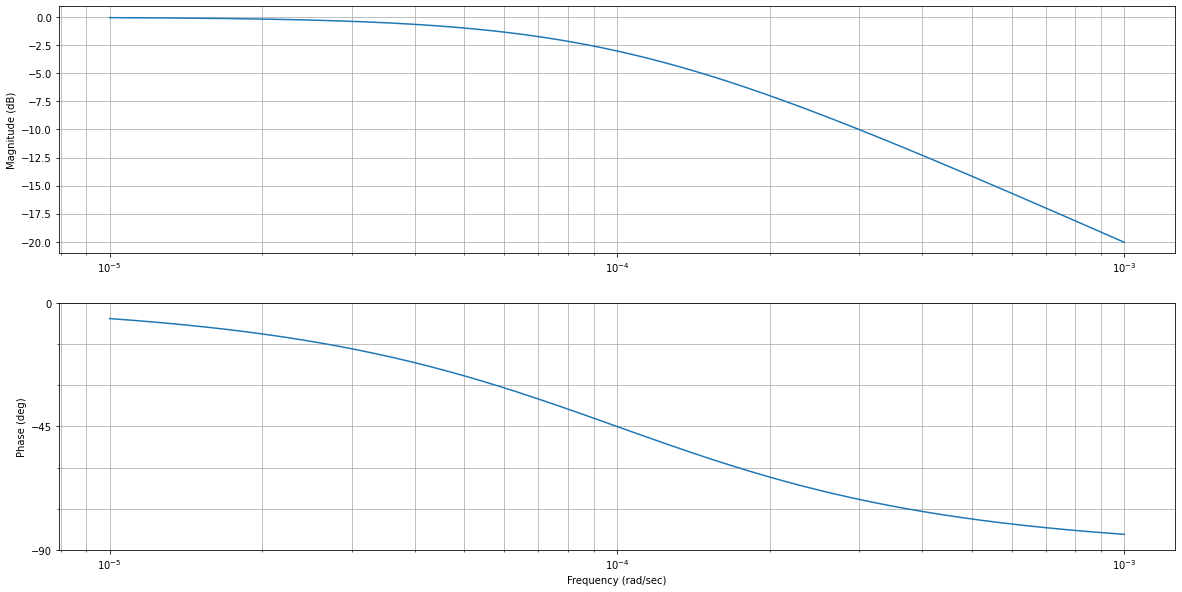

In [20]:
tI2 = 10000
f2 = ml.tf([1], [tI2, 1])
fig = plt.figure("", figsize=(20,10))
ml.bode(f2);

- Tracez le diagramme de Bode de $f_1=\tau_1p+1$:

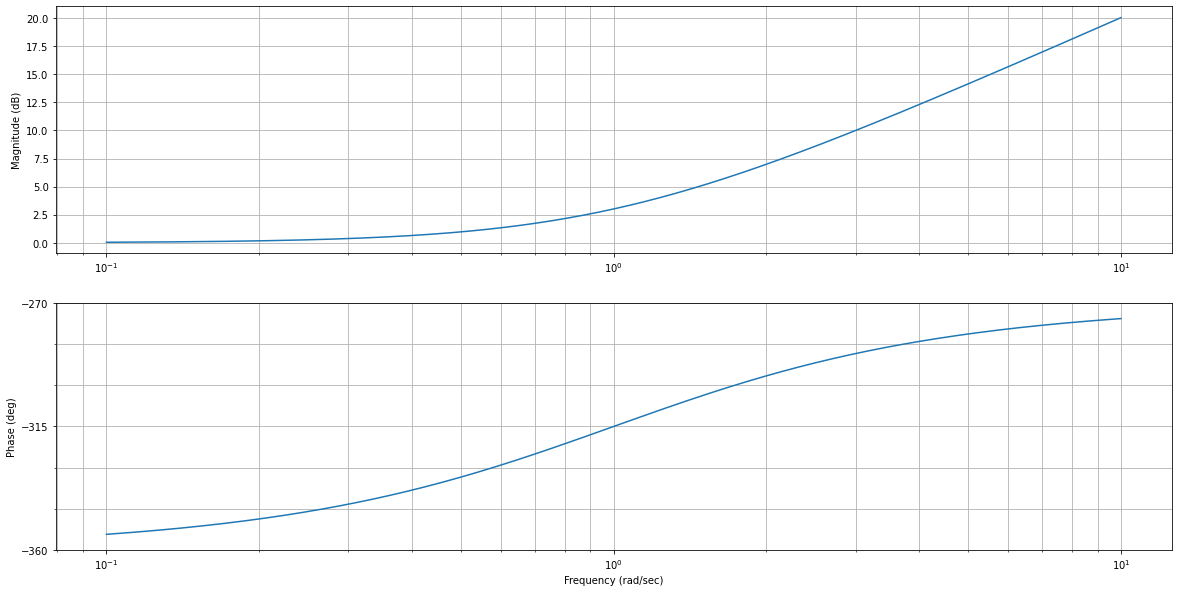

In [21]:
tI1 = 1
f1 = ml.tf([tI1, 1], [1])
fig = plt.figure("", figsize=(20,10))
ml.bode(f1);

- Tracez le diagramme de Bode de la fonction finale $H=f_1*f_2*f_3$ et observez l’addition graphique des différentes contributions :

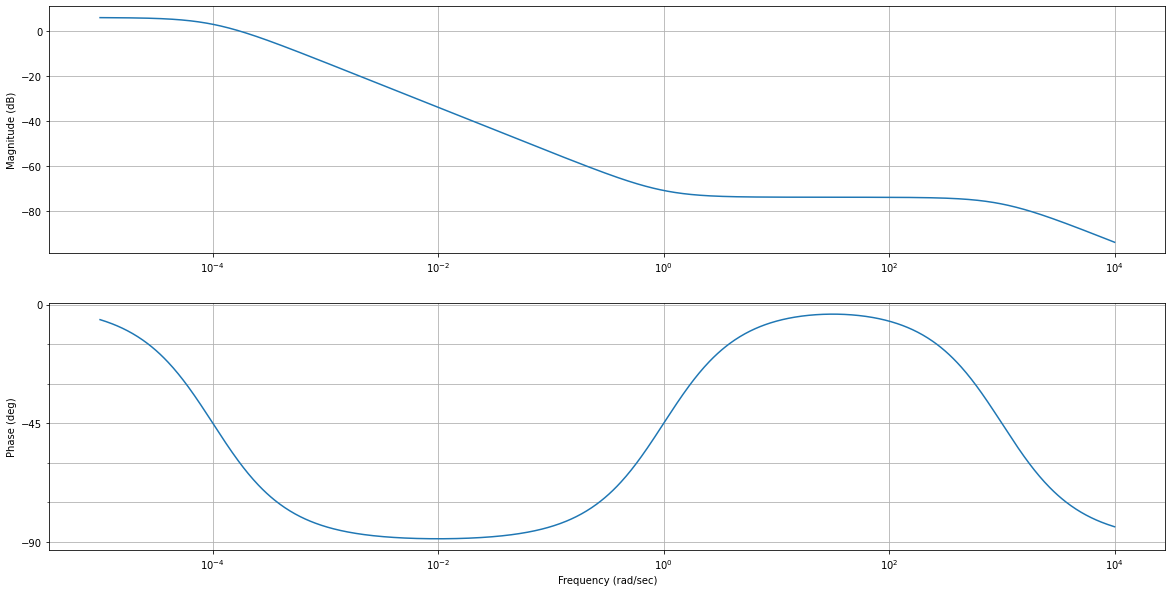

In [22]:
Kp = 2
tI3 = 0.001
f3 = ml.tf([1], [tI3, 1])

H = Kp*f1*f2*f3
fig = plt.figure("", figsize=(20,10))
ml.bode(H);

Effet si les pulsations caractéristiques sont plus proches : $\tau_1=1s$, $\tau_2=10s$ et $\tau_3=0,01s$:

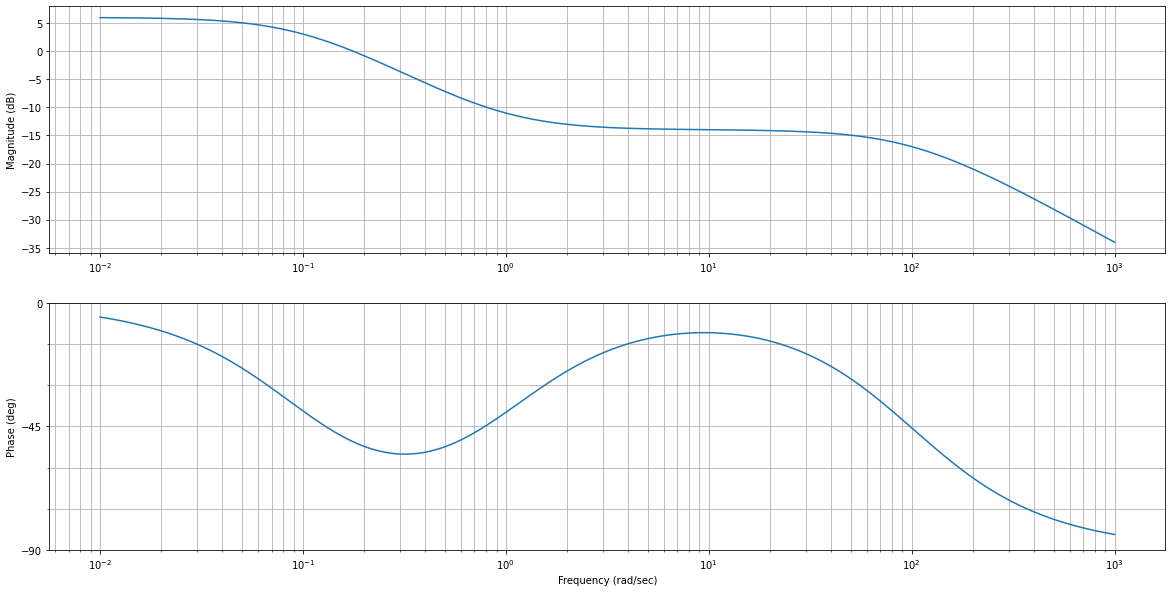

In [23]:
tI1 = 1
tI2 = 10
tI3 = 0.01

f1 = ml.tf([tI1, 1], [1])
f2 = ml.tf([1], [tI2, 1])
f3 = ml.tf([1], [tI3, 1])

H = Kp*f1*f2*f3
fig = plt.figure("", figsize=(20,10))
ml.bode(H);

Effet si les pulsations caractéristiques sont dispersées : $\tau_1=0.001s$, $\tau_2=10000s$ et $\tau_3=1s$ et $K_P=2$:

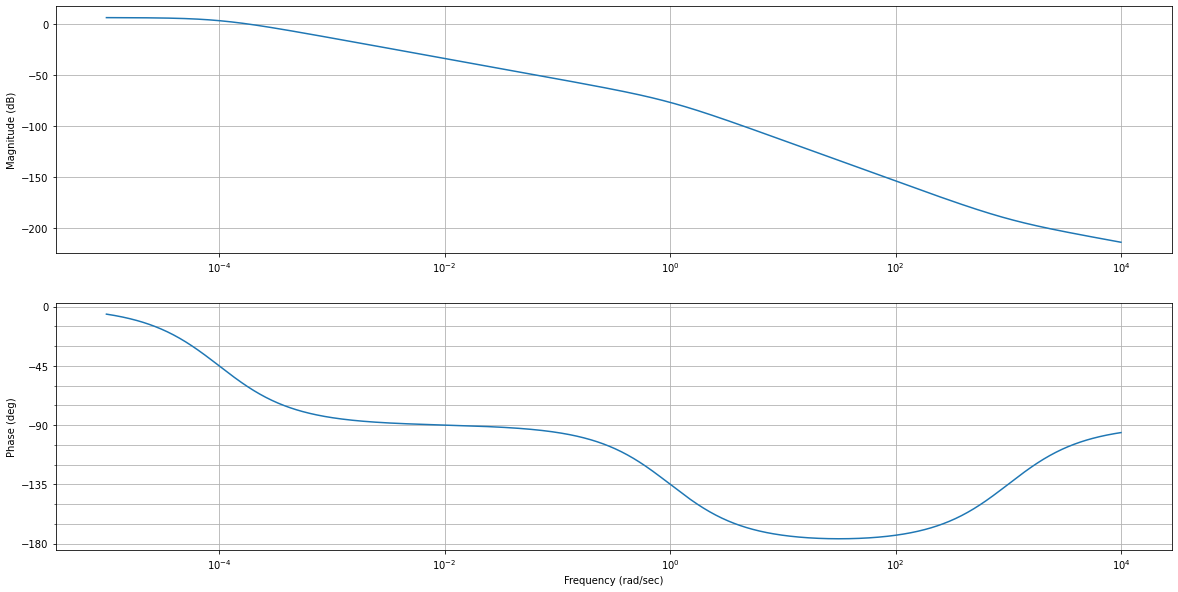

In [24]:
tI1 = 0.001
tI2 = 10000
tI3 = 1
Kp = 2

f1 = ml.tf([tI1, 1], [1])
f2 = ml.tf([1], [tI2, 1])
f3 = ml.tf([1], [tI3, 1])

H = Kp*f1*f2*f3
fig = plt.figure("", figsize=(20,10))
ml.bode(H);

### [Facultatif] Exercice 4 page 7-9 (fait au cours)

Soit la fonction de boucle ouverte d'un processus d'asservissement de position: 

$$G(p)=\frac {1}{(1+0,1p)(1+0,01p)}$$

Auquel on applique un correcteur PI: 

$$C_{PI}=\frac{15.55p+18.42}{0.8445p}$$

Observez l’effet du pôle à l’origine : 
- sur le module :
- sur la phase :

Comment cela se traduit-il sur la réponse indicielle? :